# Essai apprentissage - 2 couche
Dataset prep : fft + sans 4heure avant sans 4h apres

In [8]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten, Lambda, Reshape, Permute
from keras.layers.convolutional import Convolution1D, Convolution2D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,Adadelta,RMSprop
from keras.constraints import max_norm

# Training du CNN sur le patient 1

In [9]:
x,y = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(1)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(1)+'_y_4hours.npy')
train_images, train_labels,test_images, test_labels = np.expand_dims(x[19075:],-1),to_categorical(y[19075:]),np.expand_dims(x[:19075],-1),to_categorical(y[:19075])

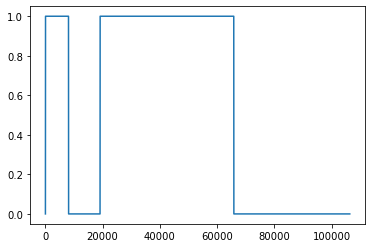

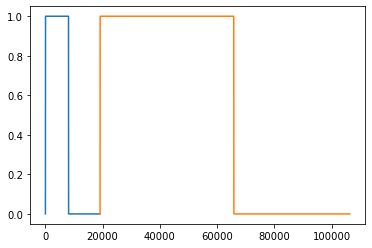

In [10]:
plt.plot(np.arange(0,len(y)),y)
plt.show()
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1])
plt.show()


In [11]:
shuffled_index_train =np.arange(0,len(train_labels))
np.random.shuffle(shuffled_index_train)
train_images, train_labels = train_images[shuffled_index_train,:,:,:],train_labels[shuffled_index_train,:]

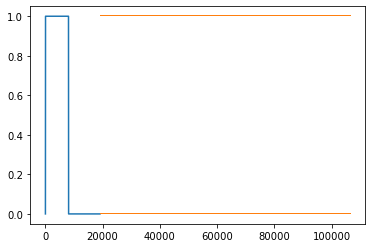

In [12]:
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1],',')
plt.show()

In [13]:
train_images.shape

(87273, 129, 15, 1)

In [14]:
model = models.Sequential()

#model.add(layers.Input(train_images.shape[1:]))
model.add(layers.BatchNormalization(axis=1, name='normal1'))
model.add(layers.Convolution2D(4,(15,5),activation = 'relu',padding='valid', strides=(1,2),name='conv1'))
model.add(layers.MaxPooling2D(pool_size=(1,2)))

model.add(layers.BatchNormalization(axis=1, name='normal2'))
model.add(layers.Convolution2D(4,(1,3),activation = 'relu',padding='valid', strides=(1,2),name='conv2'))
model.add(layers.MaxPooling2D(pool_size=(2,1)))

#model.add(layers.BatchNormalization(axis=1, name='normal3'))
#model.add(layers.Convolution2D(64,(1,3),activation = 'relu',padding='valid', strides=(1,1),name='conv3'))
#model.add(layers.MaxPooling2D(pool_size=(2,1)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='sigmoid', name='dens1'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, activation='softmax',name='dens2'))


model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy','AUC'])


In [15]:


history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


2022-07-01 15:31:16.496387: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 675493020 exceeds 10% of free system memory.


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

2022-07-01 15:31:26.875974: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 644.20MiB (rounded to 675493120)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-07-01 15:31:26.876047: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2022-07-01 15:31:26.876082: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 5, Chunks in use: 5. 1.2KiB allocated for chunks. 1.2KiB in use in bin. 28B client-requested in use in bin.
2022-07-01 15:31:26.876108: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-07-01 15:31:26.876131: I tensorflow/core/com

In [ ]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

model.evaluate(test_images,  test_labels, verbose=2)


In [ ]:
for i in range(len(model.layers)-7):
    model.layers[i].trainable = False

# Transfert du modèle sur le patient 10

In [ ]:
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(10)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(10)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [ ]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

In [ ]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:47000],x2[70000:])),np.concatenate((y2[:47000],y2[70000:])),x2[47000:70000,:,:],y2[47000:70000]


In [ ]:
plt.plot(np.arange(0,len(y2_train)),y2_train)
plt.show()
plt.plot(np.arange(0,len(y2_test)),y2_test)
plt.show()
plt.plot(np.concatenate((np.arange(0,len(y2))[:47000],np.arange(0,len(y2))[70000:])),np.concatenate((y2[:47000],y2[70000:])))
plt.plot(np.arange(0,len(y2))[47000:70000],y2[47000:70000])
plt.show()

In [ ]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=2, 
                    validation_data=(x2_test, y2_test))

In [ ]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# transfert du modele sur le patient 20

In [ ]:
n_patient = 20
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [ ]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

In [ ]:
x2_train, y2_train, x2_test, y2_test = x2[:50000],y2[:50000],x2[50000:],y2[50000:]


In [ ]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=2, 
                    validation_data=(x2_test, y2_test))

In [ ]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')